In [11]:
import numpy as np
import numpy.matlib 
import math
import matplotlib.pyplot as plt
import csv
from matplotlib import cm

Consider the Lotka-Volterra equations 

$$\begin{cases} \dfrac{\mathrm{d} x}{\mathrm{d} t}=x(\alpha -\beta y) \\
                \dfrac{\mathrm{d} y}{\mathrm{d} t}=y(\delta x -\gamma)\end{cases}$$

for $\alpha=0.1$, $\beta=0.02$, $\gamma=0.4$, $\delta=0.02$. 


1. Use Euler's method to simulate the system from the initial condition $x(0)=10$, $y(0)=10$ with $\mathrm{d}t=0.01$. 
   Show that the system is unstable by considering a high number of steps in your simulation. To do so, plot the solution      $\big(x(t), y(t)\big)$ in the phase potrait.


2. Use Runge-Kutta 2 or the Midpoint method to simulate the system. Show that methods lead to stable trajectories in comparison to Euler. As before, plot the solutions $\big(x(t), y(t)\big)$ for the different methods. 



In the following cell, I define a class to simulate different numerical methods for a 2-dimensional system. The class has the same structure as the one in the previous lab, but has been generalised to deal with higher dimensions.
The class receives as input the function f, which for the case considered is two dimensional. The function $f$ needs to receive as input a vector of values (the values of $x(t)$ and $y(t)$) and the value of $t$ (even if the system is autonomous and the function has no explicit dependence on t). For instance, see how I defined the function in the cell after the next one.

* The method Initialise set the initial condition (the starting values of x and t) from which we want to simulate.


- The method Euler performs Euler's method. 

- The method MidPoint performs the Midpoint method.

- The method RungeKutta2 performs RungeKutta 2.

All these last three methods receive as input the value of $\mathrm{d}t$ adopted and the number of iterations considered.
The output of all these methods are: X. the dynamic of the system across time; T, the values of time used in the simulation.


In [12]:
class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
        self.N_dim=[]
        
        
    def Initialise(self,x_start,t_start):
        
        
        self.N_dim=np.shape(x_start)[0]
        self.x=x_start
        self.t=t_start
        
        
    def Euler(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)               ## The main differenece in comparison to the class in the previous lab is in the definition 
                                             ## and utilisation of variables x and X, which are multidimensional.  
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
        
            self.x=self.x+dt*self.f(self.x,self.t)
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def MidPoint(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            x_mp=self.x+dt/2*self.f(self.x,self.t)
            self.x=self.x+dt*self.f(x_mp,self.t+dt/2)
            
            
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def RungeKutta2(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            k1=self.f(self.x,self.t)
            k2=self.f(self.x+dt*k1,self.t+dt)    
                        
            self.x=self.x+dt*(k1+k2)/2
            
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T

                


In [13]:
def f(x,t):     ## Definition of the function for Lotka-Volterra. t needs to be an input even if the function does not use it, as in this case.
                ## This formulation permits us to be general and to apply the same code to non autonomous systems.
    
    alpha=0.1
    beta=0.02
    gamma=0.4
    delta=0.02
    
    z=np.zeros([np.shape(x)[0]])
    
    z[0]=x[0]*(alpha-beta*x[1])
    z[1]=x[1]*(delta*x[0]-gamma)
    
    return z

## As in the previous lab, use the class and the function above to complete the exercise...

NM=Numerical_methods(f)           ## Object definition


dt=0.01                           ## Value of dt
N_iter=int(1000/dt)               ## Number of iteration. 

X_euler=np.zeros([2,N_iter])
X_MP=np.zeros([2,N_iter])
X_RK2=np.zeros([2,N_iter])


x_start=[11,9]     
t_start=0.

# NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
# X_euler,ts=NM.Euler(dt,N_iter) 

# NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
# X_MP,ts=NM.MidPoint(dt,N_iter)

# NM.Initialise([,10],t_start)     ## Setting the initial conditions in the object
# X_RK2,ts=NM.RungeKutta2(dt,N_iter) 

# NM.Initialise([11,9],t_start)     ## Setting the initial conditions in the object
# X_RK2_2,ts=NM.RungeKutta2(dt,N_iter) 

# NM.Initialise([12,8],t_start)     ## Setting the initial conditions in the object
# X_RK2_3,ts=NM.RungeKutta2(dt,N_iter) 

# NM.Initialise([9,11],t_start)     ## Setting the initial conditions in the object
# X_RK2_4,ts=NM.RungeKutta2(dt,N_iter) 

# NM.Initialise([8,12],t_start)     ## Setting the initial conditions in the object
# X_RK2_5,ts=NM.RungeKutta2(dt,N_iter) 

# NM.Initialise([7,13],t_start)     ## Setting the initial conditions in the object
# X_RK2_6,ts=NM.RungeKutta2(dt,N_iter) 

# NM.Initialise([13,9],t_start)     ## Setting the initial conditions in the object
# X_RK2_7,ts=NM.RungeKutta2(dt,N_iter) 




Text(0.5, 0, 'Prey')

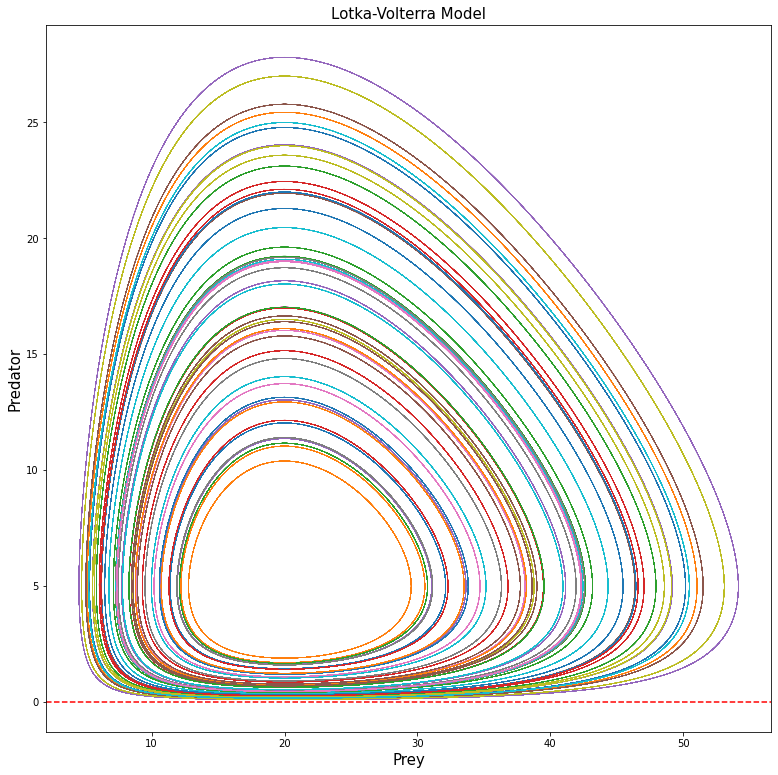

In [14]:
## DISPLAY A PHASE PLOT
fig, ax = plt.subplots(figsize=(13, 13))
import random

plt.title('Lotka-Volterra Model',fontsize=15)

arr = []
for i in range(0,50):
    ## get two random numbers between 10 and 20
    f = random.randint(10, 25)
    j = random.randint(10, 25)
    arr.append('[' + str(f) + ',' + str(j) + ']')
    NM.Initialise([f,j],t_start)     ## Setting the initial conditions in the object
    X_RK2,ts=NM.RungeKutta2(dt,N_iter) 
    plt.plot(X_RK2[0,:],X_RK2[1,:],linewidth=0.5)

# plt.plot(range(0,N_iter),X_RK2[0,:],color ='orange')
# plt.plot(range(0,N_iter),X_RK2[1,:],color ='blue')
# plt.plot(X_euler[0,:],X_euler[1,:],color ='black')
# plt.plot(X_MP[0,:],X_MP[1,:],color ='red',linewidth=4)
# plt.plot(X_RK2_6[0,:],X_RK2_6[1,:])
# plt.plot(X_RK2_5[0,:],X_RK2_5[1,:])
# plt.plot(X_RK2_4[0,:],X_RK2_4[1,:])
# plt.plot(X_RK2[0,:],X_RK2[1,:])
# plt.plot(X_RK2_2[0,:],X_RK2_2[1,:])
# plt.plot(X_RK2_3[0,:],X_RK2_3[1,:])
# plt.plot(X_RK2_7[0,:],X_RK2_7[1,:])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel('Predator',fontsize=15)
plt.xlabel('Prey',fontsize=15)

#plt.legend(arr,fontsize=13)



Consider the linear differential equations 


$$\begin{cases} \dfrac{\mathrm{d} x}{\mathrm{d} t}=-x +2y\\
                \dfrac{\mathrm{d} y}{\mathrm{d} t}=-3y\end{cases}$$


1. Find the eigenvalues and eigenvectors (numerically or analytically) of the Jacobian. To do this numerically, you can use np.linalg.eig(J), where J is the jacobian.

2. Analyse the stability of the equilibrium points.

3. Find three solutions from different initial conditions of your choice through Euler's method and plot them in a phase diagram $(x(t),y(t))$




In [15]:
## COMPUTE EIGENVALUES AND EIGENVECTORS OF THE JACOBIAN. NUMPY HAS FUNCTIONS TO DO THIS...
J = [[-1,2],[0,-3]]
eig = np.linalg.eig(J)
eigenvalues=np.array(eig[0])
eigenvectors=np.array(eig[1])

print('The eigenvalues are: ',eig[0], 'The eigenvectors are: ', eigenvectors[:,0],eigenvectors[:,1])
print('Since the eigenvalues are both negative, the equilibrium point (0,0) is stable')


The eigenvalues are:  [-1. -3.] The eigenvectors are:  [1. 0.] [-0.70710678  0.70710678]
Since the eigenvalues are both negative, the equilibrium point (0,0) is stable


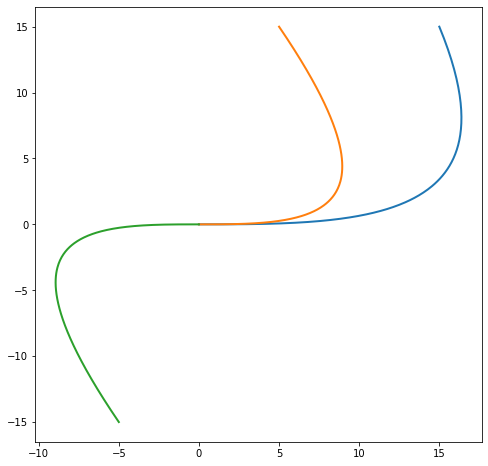

In [16]:
## USE THE GIVEN CLASS AS BEFORE TO SOLVE THE SYSTEM FOR DIFFERENT EXAMPLE INITIAL CONDITIONS

def f(x,t):     ## Definition of the function for Lotka-Volterra. t needs to be an input even if the function does not use it, as in this case.
                ## This formulation permits us to be general and to apply the same code to non autonomous systems.
        
    z=np.zeros([np.shape(x)[0]])
    
    z[0]=-x[0]+2*x[1]
    z[1]=-3*x[1]
    
    return z

## As in the previous lab, use the class and the function above to complete the exercise...

NM = Numerical_methods(f)

va = np.array([[10],[10]])

va = np.reshape(va,[2])


NM.Initialise(va,0)
dt = 0.01
t_start = 0
N_iter = int(1000/dt)
x_start=[5,15]

x_start=[15,15]                    ## First initial condition
NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler1,ts=NM.Euler(dt,N_iter) 


x_start=[5,15]                     ## Second initial condition
NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler2,ts=NM.Euler(dt,N_iter) 


x_start=[-5,-15]                   ## Third initial condition
NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler3,ts=NM.Euler(dt,N_iter) 

fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(X_euler1[0,:],X_euler1[1,:],lw=2)
plt.plot(X_euler2[0,:],X_euler2[1,:],lw=2)
plt.plot(X_euler3[0,:],X_euler3[1,:],lw=2)

